## Binary Classification Problem

- Our end goal is NOT TO BUILD A MODEL, but to build a simple neural network with keras from scratch to understand the basics of neural networks.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Checking for missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Checking for duplicated rows

df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

IMBALANCED DATASET

- 7963 people are still in this bank whereas 2037 people left the bank.

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.columns[:3]

Index(['RowNumber', 'CustomerId', 'Surname'], dtype='object')

- We'll get rid of these 3 columns as we don't need them

In [10]:
df.drop(columns=df.columns[:3], inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df.columns[1:3]

Index(['Geography', 'Gender'], dtype='object')

In [12]:
df = pd.get_dummies(df, columns = df.columns[1:3], drop_first=True)

- We have dropped a new column for each of the categorical columns. This is called one-hot encoding.

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


- Now we'll scale the values to converge the weights faster.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(columns=['Exited'])
Y = df['Exited']

In [16]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

(8000, 11) (8000,) (2000, 11) (2000,)


## Scaling

In [18]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.fit_transform(xTest)

In [19]:
xTrainScaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

## Training ANN

In [20]:
import setuptools.dist

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential             # Used for a plain stack of layers where each layer has exactly one input and one output 
from tensorflow.keras.layers import Dense               # Creates a layer where each input node is connected to output node with hidden layers in between

In [21]:
model = Sequential()            # Creating model

# Adding layers
# 1 input , 1 hidden, 1 output layer
# We'll have 3 perceptrons in hidden layer

model.add(Dense(3, activation='sigmoid', input_dim = 11))           # input layer with sigmoid activation and 11 input columns connected to a hidden layer with 3 nodes
model.add(Dense(1, activation='sigmoid'))               # output layer with one node and inputs coming from 3 nodes of hidden layer

d:\Deep Learning Notebooks\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()             # Tells us model info

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

- After training, the NN will find the values of all 40 weights and biases

In [23]:
model.compile(loss = 'binary_crossentropy', optimizer='Adam')

# compile configures the model for training ; loss applies for the loss function to use ; Optimizers are used to minimize or maximize objective function (MINIMIZE LOSS IN THIS CASE)

In [42]:
history = model.fit(xTrainScaled, yTrain, epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.4352
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.4220
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4315
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.4284
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4226
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.4333
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.4311
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 0.4241
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.4223
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 0.4170


## Plotting a data graph

In [48]:
import matplotlib.pyplot as plt

In [51]:
history             # a dict of model data

In [52]:
history.history

{'loss': [0.4311027228832245,
  0.4293365180492401,
  0.42765605449676514,
  0.4261166453361511,
  0.4246270954608917,
  0.4231394827365875,
  0.4218222498893738,
  0.42045795917510986,
  0.4192638695240021,
  0.4181569516658783]}

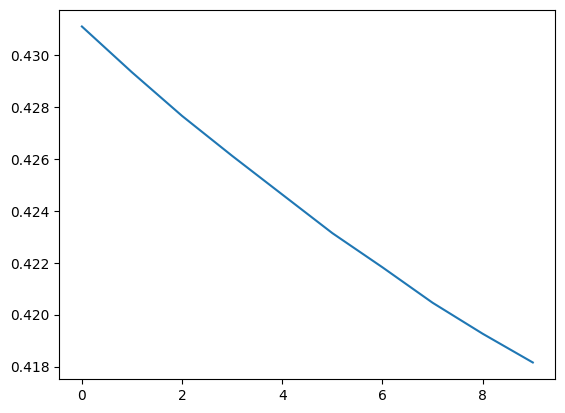

In [53]:
plt.plot(history.history['loss'])

In [25]:
model.get_weights()             # Checking weights and bias for each layer

[array([[-0.37770173,  0.3329694 ,  0.17001815],
        [ 0.8772441 ,  0.2611332 , -1.7548231 ],
        [-0.23175608,  0.42338163,  0.15679686],
        [ 0.38928998,  0.7351692 , -0.09457221],
        [-0.3329419 , -0.08670636,  0.05908111],
        [ 0.08128532, -0.3514512 , -0.07246479],
        [-0.77546984, -0.41531745,  0.6447584 ],
        [ 0.40636733, -0.42603424, -0.0420488 ],
        [ 0.64084506,  0.6158732 , -0.4659953 ],
        [ 0.32695612, -0.11048561,  0.04009773],
        [-0.04758077, -0.66170055,  0.4068157 ]], dtype=float32),
 array([-0.5107563 , -0.4980592 ,  0.70760506], dtype=float32),
 array([[ 0.4297988 ],
        [ 0.51718175],
        [-1.94571   ]], dtype=float32),
 array([-0.6684006], dtype=float32)]

In [26]:
model.layers[0].get_weights()

[array([[-0.37770173,  0.3329694 ,  0.17001815],
        [ 0.8772441 ,  0.2611332 , -1.7548231 ],
        [-0.23175608,  0.42338163,  0.15679686],
        [ 0.38928998,  0.7351692 , -0.09457221],
        [-0.3329419 , -0.08670636,  0.05908111],
        [ 0.08128532, -0.3514512 , -0.07246479],
        [-0.77546984, -0.41531745,  0.6447584 ],
        [ 0.40636733, -0.42603424, -0.0420488 ],
        [ 0.64084506,  0.6158732 , -0.4659953 ],
        [ 0.32695612, -0.11048561,  0.04009773],
        [-0.04758077, -0.66170055,  0.4068157 ]], dtype=float32),
 array([-0.5107563 , -0.4980592 ,  0.70760506], dtype=float32)]

In [27]:
model.layers[1].get_weights()

[array([[ 0.4297988 ],
        [ 0.51718175],
        [-1.94571   ]], dtype=float32),
 array([-0.6684006], dtype=float32)]

## Prediction

In [28]:
model.predict(xTestScaled)              # Output is in probability between 0 and 1 as we are using sigmoid function ; for doing this, we'll use a threshold. Ex: 0.5 if val<0.5 our point is 0 else 1 ; FOUND USING ROC-AUC curve

34/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.20313454],
       [0.11561778],
       [0.30044004],
       ...,
       [0.34610498],
       [0.08945351],
       [0.19609888]], dtype=float32)

In [29]:
y_log = model.predict(xTestScaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step


In [30]:
y_pred = np.where(y_log>0.5, 1, 0)              # condition ; if true then do this ; if false then do this

## Accuracy

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(yTest, y_pred)

0.8145

#### We can improve output by changing following : 
        
        - Increasing number of epochs
        - changing activation function
        - Increasing number of neurons in hidden layers
        - Adding more hidden layers


LAGRGE NUMBER OF HIDDEN LAYERS AND NEURONS WILL LEAD TO OVERFITTING

In [32]:
MODEL2 = Sequential()

MODEL2.add(Dense(11, activation='relu', input_dim = 11))
MODEL2.add(Dense(11, activation='relu'))
MODEL2.add(Dense(1, activation='sigmoid'))

d:\Deep Learning Notebooks\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
MODEL2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
MODEL2.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['accuracy'])            # metrices will show the values with each epoch

In [61]:
history_2 = MODEL2.fit(xTrainScaled, yTrain, epochs=100, validation_split=0.2)              # validation split will split the data into 80% and 20% and validate the model on this 20% data on each iteration

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8703 - loss: 0.3124 - val_accuracy: 0.8594 - val_loss: 0.3472
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8632 - loss: 0.3226 - val_accuracy: 0.8581 - val_loss: 0.3463
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8664 - loss: 0.3188 - val_accuracy: 0.8606 - val_loss: 0.3458
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8727 - loss: 0.3091 - val_accuracy: 0.8606 - val_loss: 0.3472
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8753 - loss: 0.3066 - val_accuracy: 0.8594 - val_loss: 0.3473
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8786 - loss: 0.3047 - val_accuracy: 0.8594 - val_loss: 0.3471
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8738 - loss: 0.3068 - val_accuracy: 0.8625 - val_loss: 0.3457
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8696 - loss: 0.3126 - val_accu

### IF TRAINING ACCURACY IS HIGHER THAN VALIDATION ACCURACY, THEN THE MODEL IS OVERFITTING

- In this case, we have slight overfitting as training accuracy is 86% and validation accuracy is 85%

In [38]:
MODEL2.get_weights()

[array([[-0.5165449 ,  0.20108417, -0.02172772, -0.00572766,  0.3582956 ,
          0.01252828, -0.15372165, -0.02032892, -0.0379097 , -0.0665842 ,
         -0.45837423],
        [-0.7383999 , -0.5959763 , -0.28322798, -0.06904676, -0.57007724,
          1.234117  , -0.22663166,  0.32407176, -0.02632856, -0.09020706,
          0.8605849 ],
        [ 0.15584512, -0.26597118,  0.17431016, -0.04846044, -0.16788921,
         -0.17303438, -0.18017448,  0.01535481,  0.06234457, -0.03851335,
          0.42317736],
        [-0.22436984,  0.3971587 ,  0.63739115,  0.10703186, -0.09667233,
          0.16379449,  0.445413  ,  0.185452  , -0.55137634,  0.22873427,
          0.31819433],
        [ 0.2752802 ,  0.05314292, -0.05868606,  1.2111918 ,  0.43854246,
         -0.3121369 , -0.5317131 , -0.26964816,  1.0114706 ,  0.5894637 ,
          0.3590517 ],
        [-0.22800928,  0.34121272,  0.04078718, -0.0905998 ,  0.03290179,
         -0.04438489, -0.494023  ,  0.08028316, -0.04963242,  0.1482758

In [39]:
Y_LOG2 = MODEL2.predict(xTestScaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [40]:
Y_PRED = np.where(Y_LOG2>0.5, 1, 0)

In [41]:
accuracy_score(yTest, Y_PRED)

0.861

In [66]:
history_2.history

{'accuracy': [0.8715624809265137,
  0.8725000023841858,
  0.8706250190734863,
  0.8700000047683716,
  0.8720312714576721,
  0.8725000023841858,
  0.8714062571525574,
  0.8728125095367432,
  0.8695312738418579,
  0.8712499737739563,
  0.8715624809265137,
  0.8721874952316284,
  0.8704687356948853,
  0.8714062571525574,
  0.8720312714576721,
  0.8709375262260437,
  0.8707812428474426,
  0.8717187643051147,
  0.8715624809265137,
  0.8714062571525574,
  0.8714062571525574,
  0.8721874952316284,
  0.8709375262260437,
  0.8709375262260437,
  0.8706250190734863,
  0.8707812428474426,
  0.8723437786102295,
  0.8720312714576721,
  0.87109375,
  0.8732812404632568,
  0.8725000023841858,
  0.8721874952316284,
  0.8715624809265137,
  0.8712499737739563,
  0.8729687333106995,
  0.8720312714576721,
  0.8720312714576721,
  0.8706250190734863,
  0.8714062571525574,
  0.870312511920929,
  0.871874988079071,
  0.8726562261581421,
  0.871874988079071,
  0.8714062571525574,
  0.8721874952316284,
  0.87156

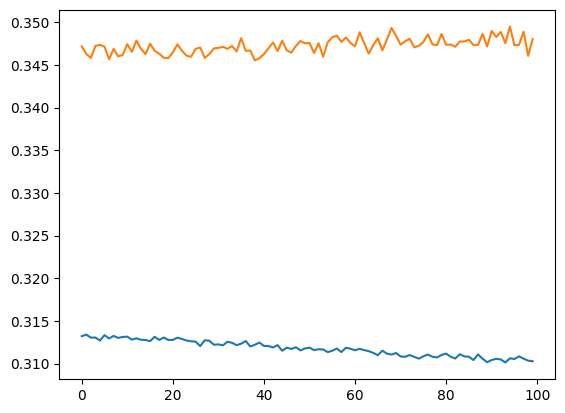

In [77]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])

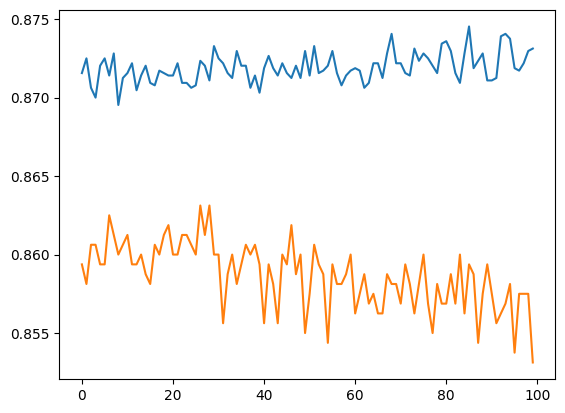

In [72]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])